In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('appl_preprocessed_open.csv')

In [ ]:
df.head()

,date,open,day
0,2018-06-06 00:00:00+00:00,192.940833,Wednesday
1,2018-06-07 00:00:00+00:00,193.369286,Thursday
2,2018-06-08 00:00:00+00:00,191.268571,Friday
3,2018-06-09 00:00:00+00:00,191.510000,Saturday
4,2018-06-10 00:00:00+00:00,191.216667,Sunday


In [ ]:
df.index = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])

In [ ]:
df = df['2020-09-15':]

<Axes: xlabel='date'>

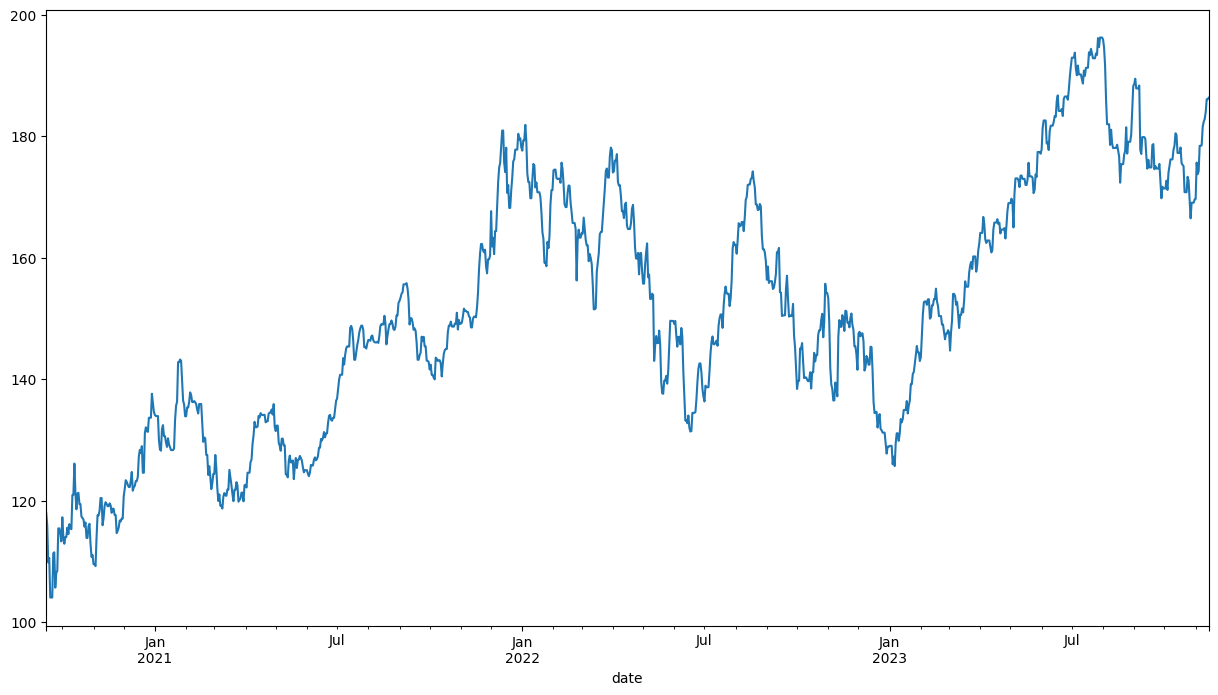

In [ ]:
df['open'].plot(figsize=(15,8))

In [ ]:
import pmdarima as pm

model = pm.auto_arima(df['open'],m=3,seasonal=True, start_p=0, start_q=0, max_order=4, test='adf',stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[3] intercept   : AIC=inf, Time=5.61 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=4896.465, Time=0.10 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=4893.061, Time=0.53 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=4893.039, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=4895.464, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[3] intercept   : AIC=4891.470, Time=0.48 sec
 ARIMA(0,1,1)(1,0,0)[3] intercept   : AIC=4893.049, Time=0.45 sec
 ARIMA(0,1,1)(1,0,1)[3] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(1,1,1)(0,0,0)[3] intercept   : AIC=4893.457, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[3] intercept   : AIC=4893.450, Time=0.33 sec
 ARIMA(1,1,0)(0,0,0)[3] intercept   : AIC=4891.475, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[3] intercept   : AIC=4895.206, Time=0.79 sec
 ARIMA(0,1,1)(0,0,0)[3]             : AIC=4890.332, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[3]             : AIC=4891.946, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[3]             : AIC=4

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1081
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2277.580
Date:                Thu, 23 Nov 2023   AIC                           4559.161
Time:                        00:27:32   BIC                           4569.130
Sample:                    09-15-2020   HQIC                          4562.936
                         - 08-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0857      0.026      3.361      0.001       0.036       0.136
sigma2         3.9743      0.109     36.350      0.000       3.760       4.189
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               403.25
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                            -0.18
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train=df[df.index.get_level_values(0)<'2023-09-01']['open']
test=df[df.index.get_level_values(0)>='2023-09-01']['open']

In [ ]:
test.shape

(75,)

In [ ]:
model.fit(train)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 3),
      suppress_warnings=True, with_intercept=False)

In [ ]:
forecast=model.predict(n_periods=75, return_conf_int=True)

In [ ]:
forecast_df = pd.DataFrame(list(forecast[0]),index = test.index,columns=['Prediction'])

In [ ]:
forecast_df

,Prediction
date,
2023-09-01 00:00:00+00:00,188.623165
2023-09-02 00:00:00+00:00,188.653438
2023-09-03 00:00:00+00:00,188.656033
2023-09-04 00:00:00+00:00,188.656256
2023-09-05 00:00:00+00:00,188.656275
...,...
2023-11-10 00:00:00+00:00,188.656276
2023-11-11 00:00:00+00:00,188.656276
2023-11-12 00:00:00+00:00,188.656276


<Axes: xlabel='date'>

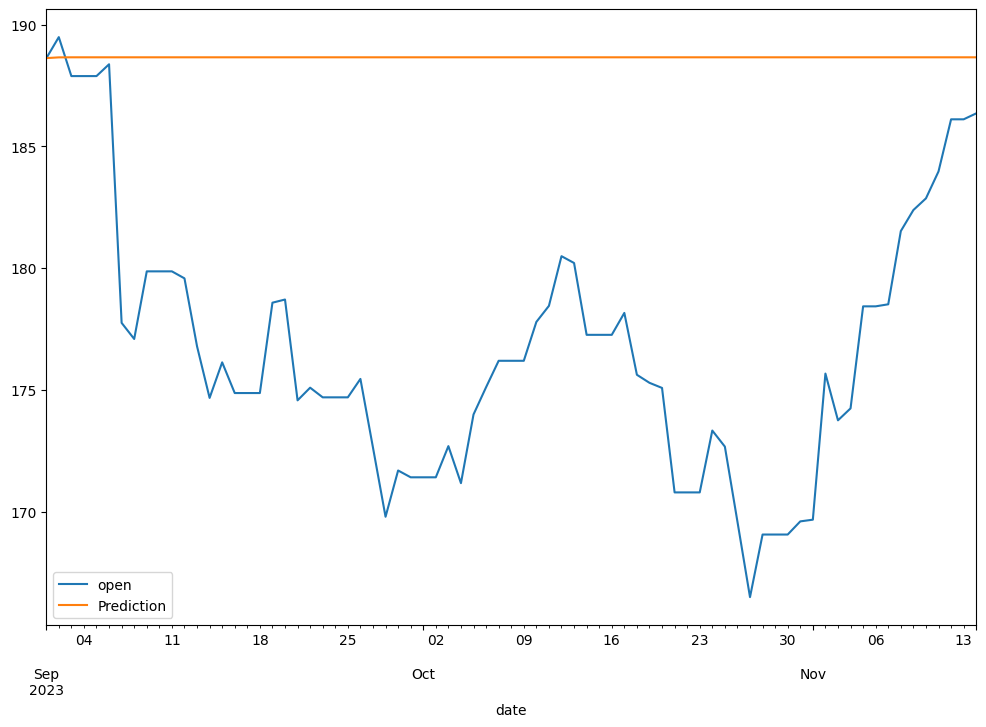

In [ ]:
pd.concat([df['open'],forecast_df],axis=1)[:]['2023-09-01':].plot(figsize=(12,8))

In [ ]:
!pip install prophet

# Prophet Model

In [ ]:
from prophet import Prophet

In [ ]:
df['ds'] = df.index

In [ ]:
df['ds'] = df['ds'].dt.date

In [ ]:
df = df.rename(columns={"open":"y"})

In [ ]:
df.reset_index(inplace=True)

In [ ]:
train=df[df['ds']<pd.to_datetime('2023-09-01')]
test=df[df['ds']>=pd.to_datetime('2023-09-01')]


<ipython-input-217-342e3f60e24f>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  train=df[df['ds']<pd.to_datetime('2023-09-01')]
<ipython-input-217-342e3f60e24f>:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  test=df[df['ds']>=pd.to_datetime('2023-09-01')]


In [ ]:
train

,date,y,day,ds
0,2020-09-15 00:00:00+00:00,118.000000,Tuesday,2020-09-15
1,2020-09-16 00:00:00+00:00,115.950000,Wednesday,2020-09-16
2,2020-09-17 00:00:00+00:00,109.820000,Thursday,2020-09-17
3,2020-09-18 00:00:00+00:00,110.530000,Friday,2020-09-18
4,2020-09-19 00:00:00+00:00,104.030000,Saturday,2020-09-19
...,...,...,...,...
1076,2023-08-27 00:00:00+00:00,179.100000,Sunday,2023-08-27
1077,2023-08-28 00:00:00+00:00,179.100000,Monday,2023-08-28
1078,2023-08-29 00:00:00+00:00,180.341667,Tuesday,2023-08-29
1079,2023-08-30 00:00:00+00:00,184.150000,Wednesday,2023-08-30


In [ ]:
m = Prophet(interval_width=0.95)

In [ ]:
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfoyyrk6o/8bd0d2ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfoyyrk6o/rkqu4r__.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4284', 'data', 'file=/tmp/tmpfoyyrk6o/8bd0d2ig.json', 'init=/tmp/tmpfoyyrk6o/rkqu4r__.json', 'output', 'file=/tmp/tmpfoyyrk6o/prophet_modelahdwcu0p/prophet_model-20231123003637.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:36:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:36:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=len(test), freq='D')
future.tail()

,ds
1151,2023-11-10
1152,2023-11-11
1153,2023-11-12
1154,2023-11-13
1155,2023-11-14


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1151,2023-11-10,185.704668,166.564997,207.148894
1152,2023-11-11,186.048646,164.576028,206.704246
1153,2023-11-12,186.318644,164.759462,206.901369
1154,2023-11-13,186.603597,166.923606,208.321461
1155,2023-11-14,187.312129,165.510120,209.426208


<ipython-input-228-dc56b44d84af>:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  pd.concat([df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot(figsize=(12,8))


<Axes: xlabel='ds'>

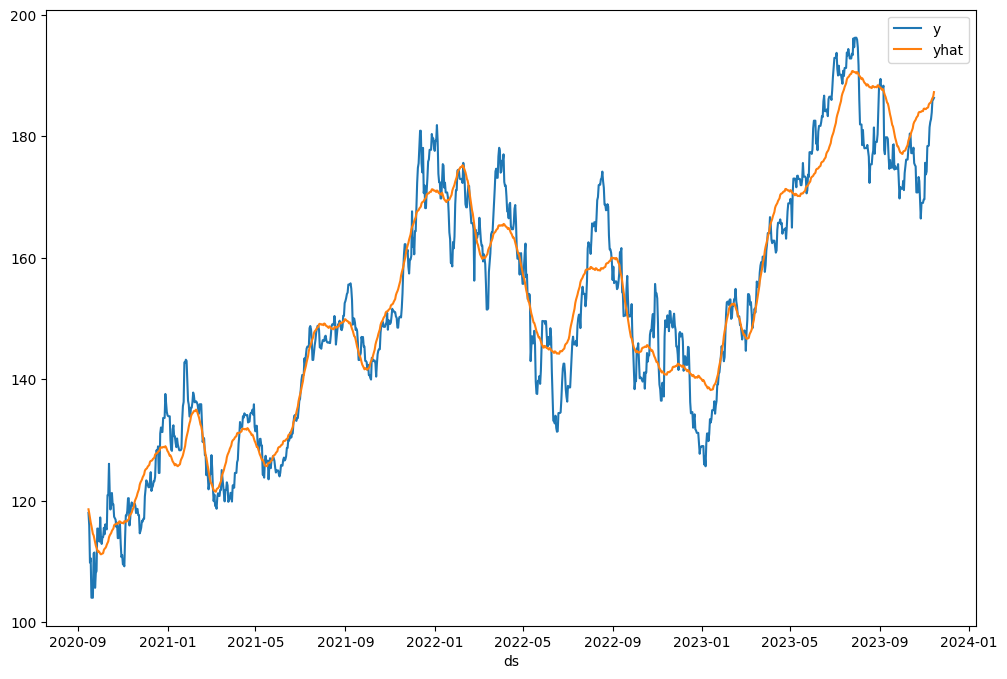

In [ ]:
pd.concat([df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot(title = "Prophet predictions",figsize=(12,8))

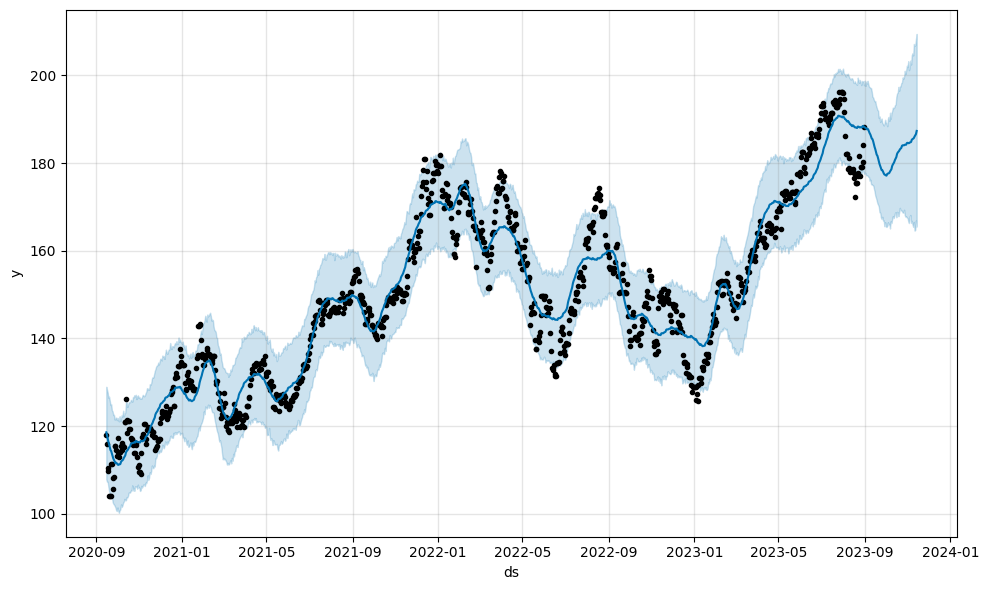

In [ ]:
fig1 = m.plot(forecast)

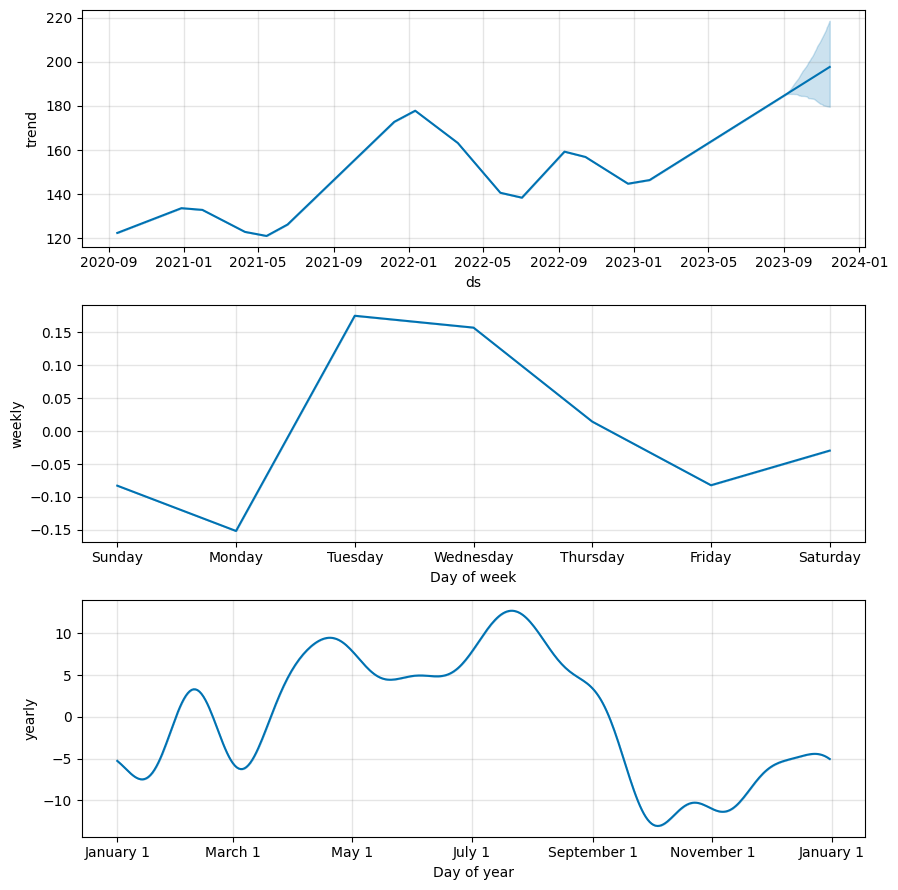

In [ ]:
fig2 = m.plot_components(forecast)